# **Comparing Stats for Soccer Players Among Top 5 Leagues**

Ivo Tomasovich and Josh Allison

joshwa829.github.io/

##**Introduction**
Soccer, or football as it is known globally, is the world's most popular sport. Clubs spend a significant amount of resources scouting and acquiring players to give their teams a better result. Among all positions, midfielders play a crucial role, bridging defense and attack. They can directly influence game outcomes through their versatility. Defenders and attackers generally specialize at their positions needs, that being either scoring and adding to an attack versus defending and stopping an attack. Midfielders have to do a combination of both of those making them trickier to value because some may be better at one aspect versus the other.
Our project investigates midfielders in the top five European leagues—Premier League, La Liga, Serie A, Bundesliga, and Ligue 1—to determine:

1. Which league has the best-performing midfielders on average.
2. Which leagues offer the most accurate market value based on players perfomance.

Our findings aim to provide soccer scouts and analysts with a data-driven starting point to identify undervalued talent pools of midfielders and better allocate scouting resources.

##**Motivation**
Understanding the value and performance of midfielders across leagues is crucial for clubs operating within constrained budgets. The results of this analysis can help scouts focus on leagues that provide the highest return on investment or fulfill specific tactical needs. By combining performance statistics and market value data, we create a resourceful analysis that bridges raw player stats with economic insights.



##**Data Sources**
Our analysis utilizes two primary datasets:

The first data set is a Player Statistics Dataset.

It Contains over 100 performance statistics for every player across all five leagues from the 2021–2022 season.
Source: Kaggle (https://www.kaggle.com/datasets/vivovinco/20212022-football-player-stats)

This dataset is great for our analysis because of the quantity of different stats; we're able to get a very good understanding of the quality of a player.

Key stats include:

1. Passing metrics to support the attack such as completion rates, progressive passes, and assists

2. General stats like minutes played, goals scored, and position

Our second dataset was our Market Value Dataset.

This data set will allow us to put a monetary value on stats and other variables that are looked at when scouting players, which furthers our primary objective to make it easier for scouts to find effective, under-valued players.

It provides players market values and was scraped from TransferMarkt using BeautifulSoup.
Source: TransferMarkt (https://www.transfermarkt.us/)

Key features include:

1. Player name, nationality, league, and position
2. Market value in euros
The datasets were merged and cleaned to focus exclusively on midfielders.

We merge bring datasets together to provide scouts with a way to see which leagues have players with better stats compared to how they are valued per Euro.


#**ETL (Extraction, Transform, and Load)**



###**First Dataset**

While we could use every stat in our first dataset to compare players, it would result in the data being incomprehensible on a larger scale. As such, we decided to stick with passing stats as our primary measurement for midfielder quality. While it's true that every position benefits from having a player that's an accurate passer,our reason for this decision comes down to the heart of what a midfielder does. At their core, they have to be accurate at passing, as being more accurate at passing allows the attacks and defenders to run more freely, which opens more options for the attacks to make in their runs to score goals and defenders with their position on the pitch. Once we sort the data to only contain the stats we want, we take the average of each stat per league and rank them to see, on average, which league has the midfielders with the best stats. With this analysis, we can see what leagues are great for clubs to look at if they're looking to acquire the best midfielders for their teams. Additionally, we're sticking to players that solely have the position "MF," or Midfielder. While there are some players who are considered midfielders that aren't being considered in this data. They're typically heavily skewed towards either attacking or defending, and we don't want their stats to skew the data.

Our ETL steps are documented below:

# **Load the Dataset**
First, we load in our first dataset and display the head to show what our data looks like.

In [ ]:
#Load the data and display the head.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/2021-2022 Football Player Stats.csv')
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


## **Filter By Position**
Then, we filter out all the positions so the data frame only shows us stats from the midfielders. Using the stats of one position will make it more feasible to compare the quality of the players.

In [ ]:
#Filter by the position of MF ('Midfielder')
midfielder_df = df[df['Pos'].isin(['MF'])]
#Display results
midfielder_df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.00,0.00,0.0,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.00,0.00,0.0,8.87,0.43,0.43,50.0
11,12,Mohamed Achi,FRA,MF,Nantes,Ligue 1,20.0,2002,1,0,...,0.00,0.00,10.00,0.00,0.00,0.0,10.00,0.00,0.00,0.0
14,15,Tyler Adams,USA,MF,RB Leipzig,Bundesliga,23.0,1999,24,12,...,0.00,0.20,1.07,0.00,0.00,0.0,10.60,1.53,0.80,65.7
19,20,Michel Aebischer,SUI,MF,Bologna,Serie A,25.0,1997,12,4,...,0.00,0.41,1.63,0.00,0.00,0.0,6.73,1.22,1.63,42.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,2894,Oier Zarraga,ESP,MF,Athletic Club,La Liga,23.0,1999,31,8,...,0.08,1.15,0.69,0.08,0.00,0.0,8.08,0.62,1.46,29.6
2904,2905,Piotr Zieli?ski,POL,MF,Napoli,Serie A,28.0,1994,35,26,...,0.00,0.86,0.60,0.00,0.00,0.0,6.25,0.30,0.78,28.0
2916,2917,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,26,...,0.10,0.10,1.08,0.00,0.00,0.0,9.41,2.64,1.42,65.0
2917,2918,Szymon ?urkowski,POL,MF,Empoli,Serie A,24.0,1997,35,29,...,0.00,0.74,1.91,0.00,0.04,0.0,8.05,1.02,1.56,39.4



## **Filter By Stats**
We filter for all of the stats that are relevant when comparing midfielders. There are hundreds of columns so pulling out these stats makes analyzing the data smoother. Here, we're taking the passing stats that we mentioned earlier as well as a few general stats. The stats fall into a few general categories
1. General information about the player, such as name, league, and squad.
2. Number of passes of each type completed vs percentage of that type of pass completed (Denoted by a Cmp for complete
number or % for percentage).
3. Different types of passes (Crosses from various positions, passes completed from varying yards on the pitch)

Examples include PasMedCmp and CrsPA for passes between 15-30 yards and crosses completed in the 18-yard box.
To expand upon some of the passing stats, we chose stats that measure accuracy of the pass depending on where they are on the pitch in relation to the player receiving the pass, passes that are being completed into certain sections of the pitch, crosses being swung in and out of the box. All of these and the rest of the stats used are incredibly important in defining the quality of a midfielder, since the more accurate a player is with all of these passes, the more goal-scoring opportunities they're able to create.

In [ ]:
#Perform the filter for the appropriate stats
midfielder_df = midfielder_df.loc[:, ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'MP',
                                      '90s', 'Goals', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%',
                                      'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%',
                                      'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt', 'PasLonCmp%',
                                      'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg', 'PasAtt',
                                      'PasLive', 'PasDead', 'PasFK', 'TB', 'Sw', 'PasCrs', 'TI', 'CK',
                                      'CkIn', 'CkOut', 'CkStr', 'PasCmp', 'SCA']]
#Display results
midfielder_df


,Rk,Player,Nation,Pos,Squad,Comp,MP,90s,Goals,PasTotCmp,...,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,SCA
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,31,27.4,0.04,55.9,...,0.04,0.80,0.36,0.15,0.00,0.00,0.00,0.0,55.9,1.46
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,34,32.8,0.00,40.7,...,0.18,1.49,0.79,0.15,0.03,0.00,0.00,0.0,40.7,2.01
11,12,Mohamed Achi,FRA,MF,Nantes,Ligue 1,1,0.1,0.00,30.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,30.0,0.00
14,15,Tyler Adams,USA,MF,RB Leipzig,Bundesliga,24,15.0,0.00,52.8,...,0.07,0.40,0.20,0.93,0.00,0.00,0.00,0.0,52.8,1.67
19,20,Michel Aebischer,SUI,MF,Bologna,Serie A,12,4.9,0.00,44.1,...,0.00,2.04,0.41,0.20,1.43,0.00,0.82,0.0,44.1,1.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,2894,Oier Zarraga,ESP,MF,Athletic Club,La Liga,31,13.0,0.08,30.1,...,0.08,1.00,1.15,0.15,0.08,0.08,0.00,0.0,30.1,1.54
2904,2905,Piotr Zieli?ski,POL,MF,Napoli,Serie A,35,23.2,0.26,41.6,...,0.00,0.69,0.86,0.09,1.12,0.26,0.30,0.0,41.6,3.75
2916,2917,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,36,28.8,0.07,43.2,...,0.03,1.18,0.10,0.00,0.00,0.00,0.00,0.0,43.2,1.18
2917,2918,Szymon ?urkowski,POL,MF,Empoli,Serie A,35,25.6,0.23,28.6,...,0.00,0.39,0.74,0.20,0.00,0.00,0.00,0.0,28.6,2.34


# **Filter by League and Take Average**
We group all of the stats together and take the averages of all the players in that specific league. This gives us a better view of which league has midfielders that perform better in certain stats.

In [ ]:
#Here, we're taking the average of every stat in order for us to be able to see
#how each stat compares amongst the other leagues. By doing so, we'll
#be able to rank the stats based on highest to lowest in the future.
averages_by_league = midfielder_df.groupby('Comp').mean(numeric_only=True)
print(averages_by_league)

                         Rk         MP        90s     Goals  PasTotCmp  \
Comp                                                                     
Bundesliga      1564.010000  18.150000  12.942000  0.069500  33.294000   
La Liga         1556.123188  20.811594  13.956522  0.071957  38.261594   
Ligue 1         1416.018018  20.045045  14.204505  0.060180  44.043243   
Premier League  1379.844828  19.637931  15.360345  0.100776  38.404310   
Serie A         1467.473684  19.541353  13.276692  0.069248  39.853383   

                PasTotAtt  PasTotCmp%  PasTotDist  PasTotPrgDist  PasShoCmp  \
Comp                                                                          
Bundesliga      42.285000   74.892000  599.350000     163.180000  15.340400   
La Liga         46.729710   80.020290  725.496377     185.331159  16.376304   
Ligue 1         52.507207   82.919820  821.230631     194.161261  19.088739   
Premier League  46.205172   80.857759  706.995690     171.669828  17.099828   
Serie A

###**Second Datset**

Before we get into our analysis, we want to introduce our second data set, since we'll use it for a majority of the analysis. The data from /content/combined_file.csv' was obtained from a github repository designed to scrape data from TransferMarkt. It can be found here: (https://github.com/emordonez/transfermarkt-transfers). It asks the users a few questions, such as what year they want to scrape and what leagues they want. The program creates a table, and it uses beautifulsoup to parse through the data on a page. Specifically, it looks for html tags for charts that are on the page, and within that chart, collection data such as age, name, price, and position. When the program is done scraping, it outputs the data onto .csv files for the user. Since the files were all separate, we used the glob library in Python to combine them. The main difference between this data set and our initial one is this data set contains information specifically regarding the transfer movement of each player, such at the club they're currently in, the club they're moving to, and the fee that's being paid to transfer that player. Four our purposes, we mainly want the transfer fee prices, since that number dictates how much they're worth on TransferMarkt, so we'll be dropping the rest of the data except identifier information such as league and player.


### **Mean Market Value Per League**
We loaded in our new dataset with the price '/content/combined_file.csv', and then did some transformation on the data set. We created a dataframe with the variables name', 'league', 'nationality', 'short_pos', and 'market_value'. We then again filtered by the Midfield position. After that we grouped the filtered data by 'league' and calculated the average 'market_value' for each league. It's important to note, all these values are in **Euros**.



In [ ]:
# Loading the data from the CSV file into a DataFrame
Price_df = pd.read_csv('/content/combined_file.csv')

# Selecting the relevant columns from the DataFrame
filtered_price_df = Price_df[['name', 'league', 'nationality', 'short_pos', 'market_value']]

#Filtering the data to only include rows where 'short_pos' is one of 'CM', 'DM', or 'AM'
#This narrows down the data to players in central (CM), defensive (DM), and attacking (AM) midfield positions
filtered_price_df = filtered_price_df[filtered_price_df['short_pos'].isin(['CM','DM','AM'])]

filtered_price_df = filtered_price_df.drop_duplicates(subset='name', keep='first')

# Displaying the first few rows of the filtered data
filtered_price_df.head()

# Grouping the filtered data by 'league' and calculate the average 'market_value' for each league
mean_market_values = filtered_price_df.groupby('league')['market_value'].mean().reset_index()

# Renaming columns for clarity: 'league' to 'League' and the mean 'market_value' to 'Average Market Value'
mean_market_values.columns = ['League', 'Average Market Value']

# Setting the display format for floats to show two decimal places with commas for thousands
pd.options.display.float_format = '{:,.2f}'.format

# Sorting the mean market values in ascending order and reset the index for a tidy display
mean_market_values = mean_market_values.sort_values(by='Average Market Value', ascending=True).reset_index(drop=True)

# Cleaning up some league names for consistency and readability
# Replacing '1 Bundesliga' with 'Bundesliga' and 'Laliga' with 'La Liga'
mean_market_values['League'] = mean_market_values['League'].replace({
    '1 Bundesliga': 'Bundesliga',
    'Laliga': 'La Liga'
})
# Showing the final DataFrame
mean_market_values

,League,Average Market Value
0,Ligue 1,"3,407,936.51"
1,Serie A,"3,626,284.72"
2,Bundesliga,"3,686,842.11"
3,Premier League,"6,812,295.08"
4,La Liga,"7,944,444.44"


#**EDA (Exploratory Data Analysis)**


## **Ranked Average**
Now, that we have both of our datasets sorted. For our first dataset, we take all the averages for each league and turn them into a combination of one composite score. Then we rank them in order based on this score. We make a new table with composite score rank as the variables.

These lines translate the numbers we previously had to their actual ranks based on where they were placed. Then, we display two tables.

The first table displays how each league did in each stat.

The second table takes each score per league and averages them out to give the league an overall rank. Then we display this data in a table.

The reason this calculation is so important is for scouting talent. If coaches are looking for midfielders to buy, they're going to need a way to see where the best talent pool lies. Taking this average off all the most important stats for midfielders gives scouts a starting basis for what league to look in when looking for a player that is better at a specific thing. Additionally, this data will be the basis for the rest of our analysis.


In [ ]:
#Here, we're actually ranking the data on each stat
ranked_leagues = averages_by_league.rank(ascending=False)
print(ranked_leagues)
#Set the columns for the new table and sort it by the overall rank
ranked_leagues['Composite Score'] = ranked_leagues.mean(axis = 1)
ranked_leagues['Overall Rank'] = ranked_leagues['Composite Score'].rank(ascending=True)
ranked_leagues_sorted = ranked_leagues.sort_values(by='Overall Rank')
print(ranked_leagues_sorted[['Composite Score', 'Overall Rank']])

                 Rk   MP  90s  Goals  PasTotCmp  PasTotAtt  PasTotCmp%  \
Comp                                                                     
Bundesliga     1.00 5.00 5.00   3.00       5.00       5.00        5.00   
La Liga        2.00 1.00 3.00   2.00       4.00       3.00        4.00   
Ligue 1        4.00 2.00 2.00   5.00       1.00       1.00        1.00   
Premier League 5.00 3.00 1.00   1.00       3.00       4.00        3.00   
Serie A        3.00 4.00 4.00   4.00       2.00       2.00        2.00   

                PasTotDist  PasTotPrgDist  PasShoCmp  ...   TB   Sw  PasCrs  \
Comp                                                  ...                     
Bundesliga            5.00           5.00       5.00  ... 5.00 5.00    5.00   
La Liga               3.00           3.00       4.00  ... 1.00 1.00    1.00   
Ligue 1               1.00           1.00       1.00  ... 3.00 2.00    3.00   
Premier League        4.00           4.00       2.00  ... 2.00 4.00    4.00   
Serie A

## **Graphing Stats from the Premier League**

When we saw the scores, we were immediately intrigued. For those unaware, the Top 5 football leagues in terms of official UEFA (the head of European Football) was in this order: Premier League, La Liga, Series A, Bundesliga, Ligue Un. As such, we were incredibly suprised to see Ligue Un top out charts with passing stats. As such, we wanted to take certain stats from the Premier League, to see where they ranked in regards to other leagues. This will allow us to get a better visual understanding of where they rank amongst some of the most important stats for midfielders.
Those being their total pass completion percentage, their total number of crosses, how many minutes they actually play per 90, their number of assists, and both their long and medium pass percent completion. These stats are some of the most vital for creating chances to score. As we end up seeing, the actual rankings were very mixed, varying from first to fourth. Of course, these are only a few statistics, but they're interesting to note.


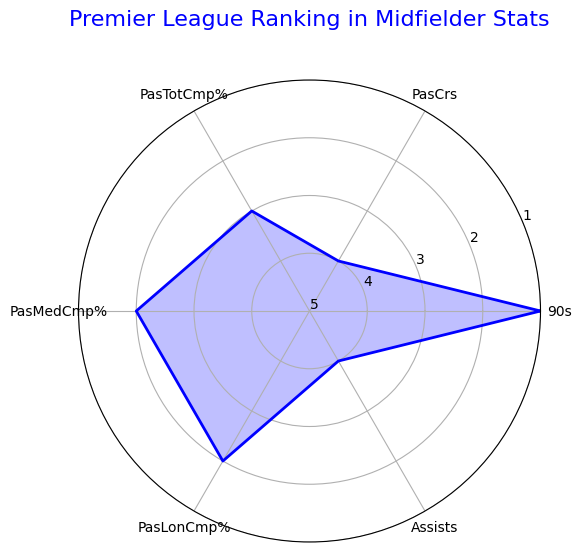

In [ ]:
#Selected stats for the radar chart
graphed_stats = ['90s', 'PasCrs', 'PasTotCmp%', 'PasMedCmp%', 'PasLonCmp%', 'Assists']

#Get the Premier League's rank for these stats
premier_league_ranks = ranked_leagues.loc['Premier League', graphed_stats]

#Normalize ranks: 1 (best) corresponds to 5 bars, 5 (worst) corresponds to 1 bar
#To achieve this, subtract rank from the maximum rank and then normalize
num_leagues = len(ranked_leagues)
normalized_ranks = (num_leagues + 1 - premier_league_ranks)  # Inverse the ranks

#Number of variables we're plotting (should match the number of stats)
num_vars = len(graphed_stats)

#Compute angle for each stat in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

#The radar chart requires the plot to be a closed shape
angles += angles[:1]  # Close the circle

#Normalize ranks for radar chart and close the shape by repeating the first value
normalized_ranks = normalized_ranks.tolist()
normalized_ranks += normalized_ranks[:1]  # Close the circle

#Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

#Plot data
ax.fill(angles, normalized_ranks, color='blue', alpha=0.25)
ax.plot(angles, normalized_ranks, color='blue', linewidth=2)

#Set the labels for each angle on the radar chart
ax.set_xticks(angles[:-1])  # Match the number of labels with the stats
ax.set_xticklabels(graphed_stats)

#Set the title of the radar chart
ax.set_title('Premier League Ranking in Midfielder Stats', size=16, color='blue', y=1.1)

#Set the range for the radial axis (1 to 5)
ax.set_ylim(1, num_leagues)  # Adjust the range according to number of leagues

#Reverse the radial axis so that rank 1 is on the outer edge and rank 5 is in the center
ax.set_yticks(range(1, num_leagues + 1))
ax.set_yticklabels([str(i) for i in range(num_leagues, 0, -1)])  # Labels should be in reverse order
ax.set_ylim(1, num_leagues)

#Show the plot
plt.show()






##**Average Market Value vs Composite Scores Graph**
Now, going back to a larger scope, we bring in our second dataset. We create a plot to visualize both the average market values (as bars) and composite scores (as red points) for each league.

Using two y-axes allows you to compare these two variables, showing how they relate within each league in a single, cohesive plot. The bars are ranked based on the average price for midfielders in the league. The red line, and its dots, represent the average score taken between the average price rank (1st being lowest, 5th being highest), and the average score taken between the stat rankings we calculated previously (1st being best, 5th being worst).

This chart provides a great way to compare the price average of players to the ranking of their stats.

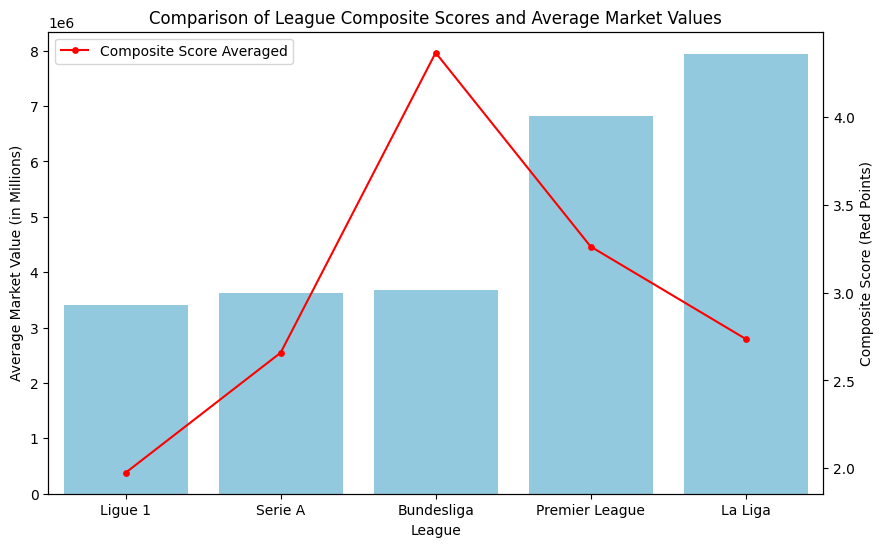

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Merging two DataFrames: `mean_market_values` and `ranked_leagues_sorted`
#Matching on 'League' from `mean_market_values` with the index of `ranked_leagues_sorted`
comparison_df = mean_market_values.merge(ranked_leagues_sorted, left_on='League', right_index=True)

#Setting up the figure size for the plot to ensure readability
plt.figure(figsize=(10, 6))

#Creating a bar plot of 'Average Market Value' for each league in `comparison_df`
#This bar plot uses a light blue color to represent average market values
ax1 = sns.barplot(x='League', y='Average Market Value', data=comparison_df, color='skyblue')
ax1.set_ylabel('Average Market Value (in Millions)')

#Using `plt.twinx()` to add a second y-axis for the next plot, sharing the x-axis with the bar plot
plt.twinx()

#Creating a point plot to represent the 'Composite Score' for each league
#Adjusting the marker size with Matplotlib's `markersize` parameter
sns.pointplot(
    x='League',
    y='Composite Score',
    data=comparison_df,
    color='red',
    label='Composite Score Averaged',
    markers='o',
    linestyles='-',
    linewidth=1.5
)

#Adding a title for the plot for clarity
plt.title('Comparison of League Composite Scores and Average Market Values')

#Labeling the y-axis on the right to represent 'Composite Score'
plt.ylabel('Composite Score (Red Points)')

#Labeling the x-axis to show 'League'
plt.xlabel('League')

#Adding a legend in the upper left to identify each plot component
plt.legend(loc='upper left')

#Display the combined bar and point plot
plt.show()



##**Distribution of Market Values for Midfielders by League**

Looking at the results of the chart, we notice a few interesting things. First, the Ligue Un and Series A, which were first and second in the rankings respectively for best stats, are actually cheapest and second cheapest respectively in the table. Normally, you would expext the better players to be worth more, but when we look at UEFA league rankings for 2021-2022, we see that Ligue Un is actually ranked the worst, and they're the only league to actually match price per quality of league by UEFA. It's important to note, to calculate this stat, UEFA uses many metrics, but the most imporant one is how clubs from these leagues perform in European competitions such as the Champions League and Europa League. Clubs from England and Spain typically perform better in these competitions than clubs from France and Italy, so the rankings make sense. Further observations of this chart indicate the Bundesliga is relatively cheap, which makes sense given its stat composite average, whereas La Liga is over twice as expensive on average to the Series A despite an almost identical rating. This chart points heavily towards there being hidden value in the Series A and Ligue Un.

To further test these results, we also produce a box plot that visualizes the distribution of market values for midfielders across different leagues.

Each league has its own box that represents the range, median, and potential outliers of market values within that league, allowing for an easy comparison of market value distributions across leagues.

Outliers, shown as individual points outside the whiskers, highlight players with exceptionally high market values relative to others in their league.

An intersting observation from the produced graph, is we see the Series A actually has the most amount of players on average that fall outside of the box plot, indicating a potential price discrepancy between the high end players and the rest of the league.

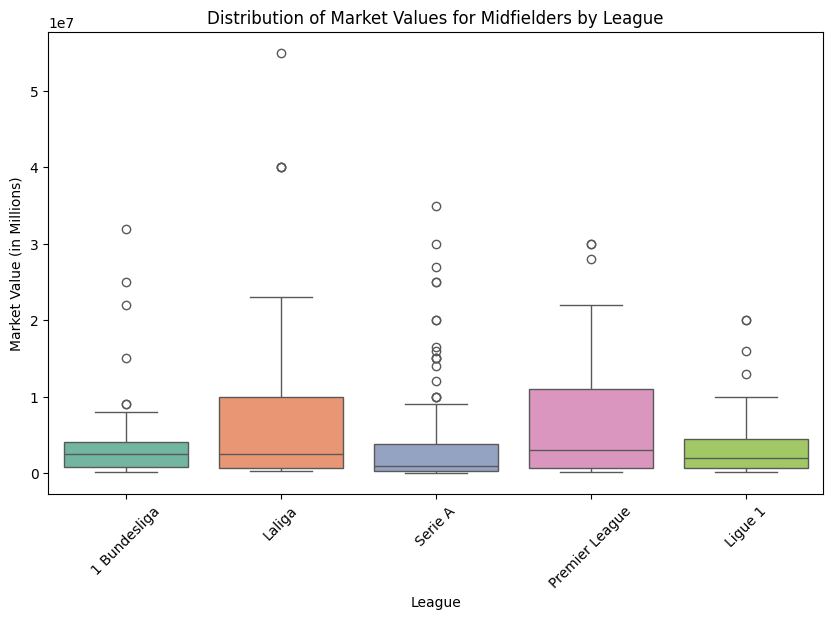

In [ ]:
#Setting up the figure size for the plot, making it wider and taller for readability
plt.figure(figsize=(10, 6))

#Creating a box plot to show the distribution of 'market_value' across different 'league' categories
#Assigning `league` to `hue` to explicitly use the palette
sns.boxplot(data=filtered_price_df, x='league', y='market_value', hue='league', palette='Set2', dodge=False)

#Setting a title for the plot to clarify its purpose
plt.title('Distribution of Market Values for Midfielders by League')

#Labeling the x-axis to indicate that it represents different leagues
plt.xlabel('League')

#Labeling the y-axis to represent market value
plt.ylabel('Market Value (in Millions)')

#Rotating the x-axis labels by 45 degrees to make them more readable if they are long
plt.xticks(rotation=45)

#Removing the redundant legend
plt.legend([],[], frameon=False)

#Displaying the plot
plt.show()



##**Top 10 Nationalities by Average Market Value**

Looking forward, another theory we wanted to test was if the nation of player impacted their price. There's a perceived notion by football fans that players from nations such as Brazil and England are worth more because those countries have a history of producing consisten world-class talent, so clubs are more willing to fork out more for them.

We first calculate the mean market value for players grouped by their nationality, then sorts these values to find the 10 nationalities with the highest average.

We then create a bar chart to visualize the top nationalities and their corresponding average market values, with labels and a title for context.

This plot provides insights into which nationalities have players with the highest average market value, helping in analyzing player value trends across different nationalities.

What we observe was not what we would expect. Why would a country such as Zambia be #1? The reasoning actually makes a lot of sense. While it's true the most expensive players are typically from top nations, those nations usually have way more players playing professionally, which balances out the average. Meanwhile, a country such as Zambia, barely has any players in the top 5 leagues, so if there are a few, and they're worth a good amount, their averages will be much higher, skewing the data, so while this isn't conclusive proof that nation doesn't player a role in price, it could indicate that the "issue" is way overblown by fans of the sport.

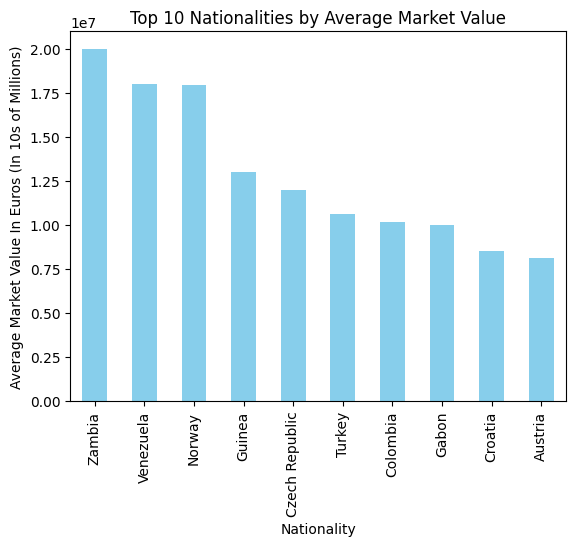

In [ ]:
#Calculating average market value by nationality and sort by descending order
avg_market_value_by_nationality = filtered_price_df.groupby('nationality')['market_value'].mean().nlargest(10).sort_values(ascending=False)
#Plotting the average market value of top nationalities
avg_market_value_by_nationality.plot(kind='bar', color='skyblue')
plt.title("Top 10 Nationalities by Average Market Value")
plt.xlabel("Nationality")
plt.ylabel("Average Market Value In Euros (In 10s of Millions)")
plt.show()


##**Comparison of PasTotCmp% and Average Market Value by League**

Before we head to our models, we wanted to create a chart that's able to have any stat placed on it to compare the average price of midfielders in the top 5 leagues with that stat. This allows scouts who are looking for a few particular stats to easily get a quick comparision on where the best value might be. In the example, we simply went with PasTotCmp%. The red line shows the average market value in those leagues. The bars showcase the actual stat and what its value is in the top 5 leagues.

We first calculated the mean total pass completion percentage and then used the average market values from before per league to plot.


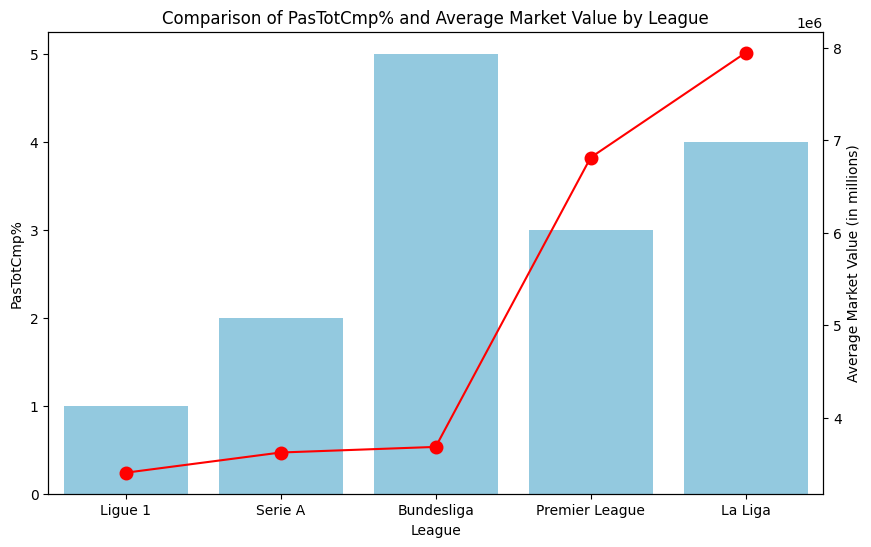

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting the values
fig, ax1 = plt.subplots(figsize=(10, 6))

#Bar plot for PasTotCmp%
sns.barplot(x='League', y='PasTotCmp%', data=comparison_df, color='skyblue', ax=ax1)
ax1.set_ylabel('PasTotCmp%')

#Overlaying a line plot for Average Market Value on a second y-axis
ax2 = ax1.twinx()
sns.pointplot(
    x='League',
    y='Average Market Value',
    data=comparison_df,
    color='red',
    markers='o',  # Marker style
    ax=ax2
)

#Customizing marker size and line width using Matplotlib's Line2D parameters
for line in ax2.lines:
    line.set_markersize(8)  # Set marker size
    line.set_linewidth(1.5)  # Set line width

# Customizing cap size for error bars if they exist
for cap in ax2.collections:
    cap.set_sizes([40])  # Adjust the size of the error bar caps

ax2.set_ylabel('Average Market Value (in millions)')

# Adding title and showing plot
plt.title("Comparison of PasTotCmp% and Average Market Value by League")
plt.show()


#**Model Development**

##**Unified Dataset**
To aid in our model development, we prepare a unified dataset that combines player statistics with their market values. We filter and select relevant stats from our two separate datasets and merge them into a single dataframe for further analysis. This will allow us to have an easier time with developing our models.

In [ ]:
#Filter the columns from
Price_df = Price_df.rename(columns={'name': 'Player'})
df_filtered = df[
    ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'MP',
     '90s', 'Goals', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%',
     'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%',
     'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt', 'PasLonCmp%',
     'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg', 'PasAtt',
     'PasLive', 'PasDead', 'PasFK', 'TB', 'Sw', 'PasCrs', 'TI', 'CK',
     'CkIn', 'CkOut', 'CkStr', 'PasCmp', 'SCA']
]

#Add the market_value column from Price_df
Price_df_filtered = Price_df[['Player', 'market_value']]

#Merge the two dataframes on 'Player'
final_df = pd.merge(df_filtered, Price_df_filtered, on='Player', how='inner')

#Display the first few rows of the resulting dataframe
print(final_df.head())



   Rk         Player Nation   Pos          Squad        Comp  MP   90s  Goals  \
0   5    Charles Abi    FRA    FW  Saint-Étienne     Ligue 1   1  0.50   0.00   
1   8  Tammy Abraham    ENG    FW           Roma     Serie A  37 34.30   0.50   
2   8  Tammy Abraham    ENG    FW           Roma     Serie A  37 34.30   0.50   
3   9     Luis Abram    PER    DF        Granada     La Liga   8  6.20   0.00   
4  18     Amine Adli    FRA  FWMF     Leverkusen  Bundesliga  25 14.00   0.21   

   PasTotCmp  ...   Sw  PasCrs   TI   CK  CkIn  CkOut  CkStr  PasCmp  SCA  \
0       4.00  ... 0.00    2.00 0.00 0.00  0.00   0.00   0.00    4.00 0.00   
1      14.60  ... 0.32    0.70 0.03 0.00  0.00   0.00   0.00   14.60 2.33   
2      14.60  ... 0.32    0.70 0.03 0.00  0.00   0.00   0.00   14.60 2.33   
3      31.30  ... 1.13    0.00 0.32 0.00  0.00   0.00   0.00   31.30 0.48   
4      28.00  ... 0.36    1.86 0.71 0.14  0.00   0.00   0.00   28.00 3.36   

   market_value  
0  2,400,000.00  
1 38,000,000.0

##**Predicted Assists**

When deciding what models we should create, we wanted to see if we'd be able to use our chosen statistics for passing to see if they could predict the practical effect they'd had on the pitch.

For this first model, we build a linear regression model to predict the number of assists a player is expected to provide based on various passing metrics, such as passing accuracy, progressive passes, and completed passes. Basically, we used the same passing stats we used to determine the top 5 league rankings. We chose to predict assists because, in theory, the better a player is at passing, the more assists they should able to produce, since they'll be able to give the attackers more opportunities to make runs into the box. Additionally, when we look at the predominate role of a midfielder, to build up play to help the attackers, a stat such as assists is a valuable to tool to understand how those passes are converting to assists.

The dataset is cleaned by dropping rows with missing values, and the data is split into training (80%) and testing (20%) sets. Numerical features are standardized to ensure equal contribution to the model, while the categorical league feature (Comp) is excluded from scaling.

The model learns from the training data by fitting a linear relationship between the features and assists, and predictions are made on both the training and testing sets.

Additionally, results are grouped by league to calculate average actual and predicted assists, visualized using a bar chart to compare the model's accuracy across leagues, providing actionable insights for evaluating player creativity and scouting decisions.

As we can see from the results, the model wasn't very good at predicting the assists. While the original ranking was Series A, Ligue Un, Bundesliga, La Liga, adn Premier League, the new ranking is Bundesliga, Ligue Un, Premier Ligue, Series A, and La Liga. While the original one does actually match our top 2 in rankings in reverse order, the actual model we created was very off. This could be for a few reasons. First, it could be that these stats aren't as influential as we might think, and it's simply a coincidence that the first 2 are almost correct when paired with rankings. Second, the stats we left out might play a great role than we think. Third, our model does not take into account tactics of teams and playstyles of the difference league or even players, which might contribute to this discreprency.

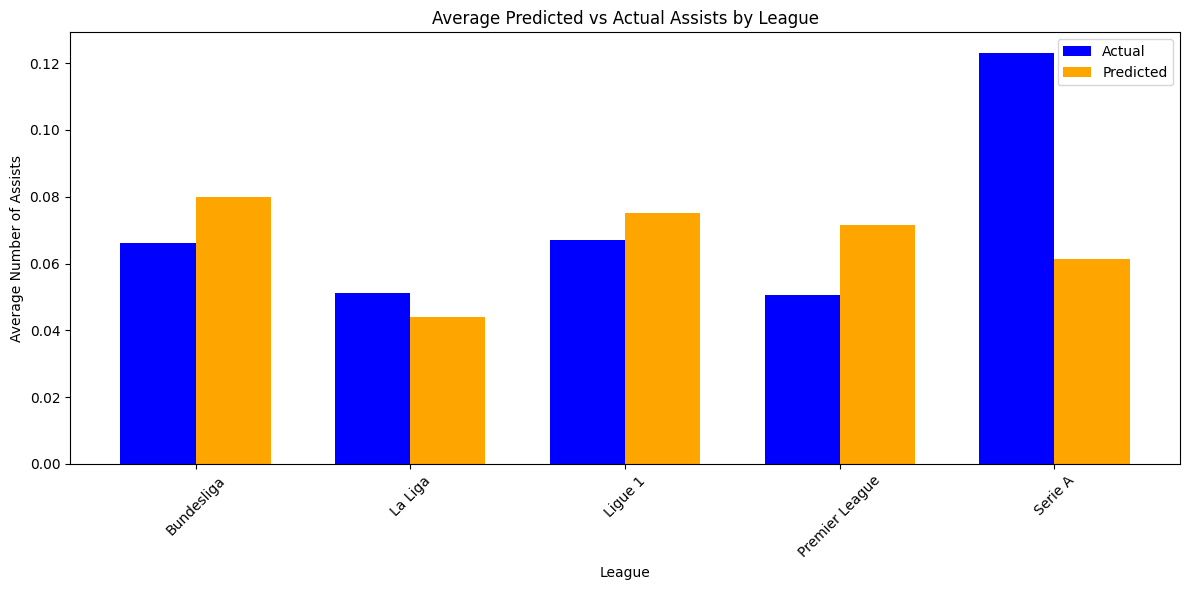

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

#Features and target variable (Assists as target)
features = [
    'PasTotCmp', 'PasTotAtt', 'PasShoCmp', 'PasShoAtt', 'PasAss',   'PasTotCmp%', 'PasMedCmp%', 'PasShoCmp%', 'PasTotPrgDist', 'PasProg', 'PPA', 'PasCrs', 'CrsPA', 'MP', 'Comp' # Keep 'Comp' for League
]
target = 'Assists'

#Drop rows with missing data in selected features or target
final_df = final_df.dropna(subset=features + [target])

#Separate input features and target
X = final_df[features]
y = final_df[target]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize numerical features (don't scale 'Comp' as it's categorical)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

#Apply scaling to the numerical columns only (exclude 'Comp')
X_train_scaled[features[:-1]] = scaler.fit_transform(X_train[features[:-1]])  # Exclude 'Comp'
X_test_scaled[features[:-1]] = scaler.transform(X_test[features[:-1]])  # Exclude 'Comp'

#Build the regression model
model = LinearRegression()
model.fit(X_train_scaled[features[:-1]], y_train)

#Predict assists
y_train_pred = model.predict(X_train_scaled[features[:-1]])
y_test_pred = model.predict(X_test_scaled[features[:-1]])


#Add predicted values to the test set for comparison, along with the League ('Comp')
test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'League': X_test['Comp']
})

#Group by league and calculate the average actual and predicted assists
league_avg = test_results.groupby('League')[['Actual', 'Predicted']].mean()

#Plotting the results for each league
plt.figure(figsize=(12, 6))

#Bar chart for actual vs predicted assists by league
bar_width = 0.35
index = np.arange(len(league_avg))

plt.bar(index, league_avg['Actual'], bar_width, label='Actual', color='blue')
plt.bar(index + bar_width, league_avg['Predicted'], bar_width, label='Predicted', color='orange')

plt.xlabel('League')
plt.ylabel('Average Number of Assists')
plt.title('Average Predicted vs Actual Assists by League')
plt.xticks(index + bar_width / 2, league_avg.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



##**Predicted Market Values**

For our second model, we wanted to see if we'd be able to predict market values based on the same stats we used in our previous model. By doing so, we can see if our 1st model was just a fluke, or if soley using passing stats is not a good method of predicting other values for midfielders. To do so, we implement a league-specific analysis to predict the market value of midfielders using a linear regression model, iterating through the top five European leagues.

For each league, the data is filtered to include only midfielders, and rows with missing values are removed. Selected performance metrics, such as assists, progressive passes, and crosses, are used as features to predict market_value. The features are standardized for uniformity, and the data is split into training and testing sets.

A linear regression model is trained for each league, and predictions are made on the test set. The average actual and predicted market values are calculated for each league and visualized using a bar chart, allowing for comparisons across leagues.

Evaluation metrics, including Mean Absolute Error (MAE) and R², are printed for each league, alongside the percentage error to assess prediction accuracy relative to average market values.

This approach highlights how performance metrics relate to market values and identifies discrepancies across leagues, offering insights for scouting and player valuation analysis.

As we see, yet again, our model was not very accurate in predicting the price. The actual market value ranking was Premier League, La Liga, Bundesliga, Series A, and Ligue Un. Meanwhile, our predicted ranking is Premier League, League Un, Series A, Bundesliga, and La Liga. Additionally, the values were simply way off, with some predictions being double or triple what they actually are.

What we can infer from this is likely the same conclusions from our previous model. Passing is only one piece of the story. While it's the most dominate attribute of a midfielder, so many other stats and playstyles combine to determine a player's true value, so it makes sense why our models wouldn't be as accurate as we wanted.

Premier League - Mean Absolute Error: 10177437.19, R² Score: 0.51
La Liga - Mean Absolute Error: 3777996.06, R² Score: 0.27
Serie A - Mean Absolute Error: 5468569.43, R² Score: 0.19
Bundesliga - Mean Absolute Error: 4639366.79, R² Score: -0.39
Ligue 1 - Mean Absolute Error: 8697361.18, R² Score: -0.21


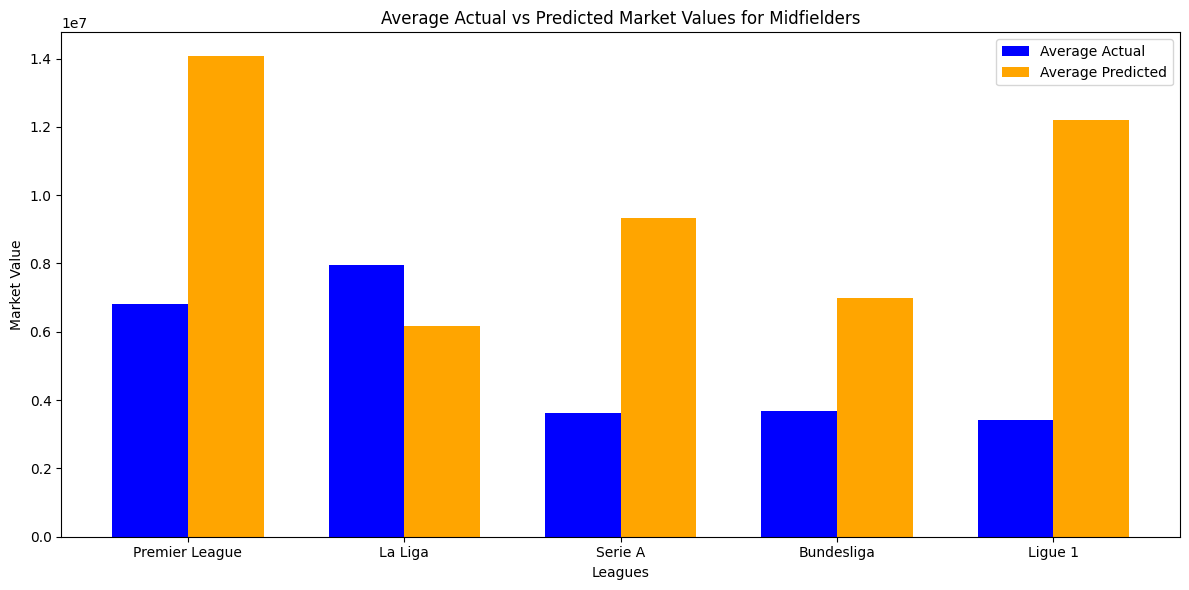

Premier League - Percentage Error: 149.40%
La Liga - Percentage Error: 47.56%
Serie A - Percentage Error: 150.80%
Bundesliga - Percentage Error: 125.84%
Ligue 1 - Percentage Error: 255.21%


In [ ]:
#Set of the leagues you're interested in
leagues = ['Premier League', 'La Liga', 'Serie A', 'Bundesliga', 'Ligue 1']

#Store average actual and predicted values for each league
average_actual_values = []
average_predicted_values = []

#Create a figure for the bar chart
plt.figure(figsize=(12, 6))

#Map league names to their pre-calculated average market values
league_average_market_values = dict(zip(mean_market_values['League'], mean_market_values['Average Market Value']))

#Initialize the scaler
scaler = StandardScaler()

#Iterate through each league and perform the analysis
for i, league in enumerate(leagues):
    #Filter data for the current league and midfielders
    league_df = final_df[(final_df['Comp'] == league) & (final_df['Pos'].str.contains('M'))]

    #Set Player column as the index for reference
    league_df = league_df.set_index('Player')

    #Select features and target variable
    features = ['Assists', 'PasTotCmp', 'PasTotPrgDist', 'PasLonCmp', 'PPA', 'SCA', 'CrsPA']
    target = 'market_value'

    #Drop rows with missing data
    league_df = league_df.dropna(subset=features + [target])

    #Separate input features (X) and target variable (y)
    X = league_df[features]
    y = league_df[target]

    #Standardize the features
    X_scaled = scaler.fit_transform(X)

    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    #Train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    #Predict market values
    y_pred = model.predict(X_test)

    #Calculate the average predicted market value
    avg_predicted = np.mean(y_pred)

    #Use the pre-calculated average market value for this league as the "actual" value
    avg_actual = league_average_market_values[league]

    #Store the average values for each league
    average_actual_values.append(avg_actual)
    average_predicted_values.append(avg_predicted)

    #Print model evaluation for the league
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{league} - Mean Absolute Error: {mae:.2f}, R² Score: {r2:.2f}")

#Bar chart comparing average actual and predicted market values for all leagues
index = np.arange(len(leagues))
bar_width = 0.35

plt.bar(index, average_actual_values, bar_width, label='Average Actual', color='blue')
plt.bar(index + bar_width, average_predicted_values, bar_width, label='Average Predicted', color='orange')

plt.xlabel('Leagues')
plt.ylabel('Market Value')
plt.title('Average Actual vs Predicted Market Values for Midfielders')
plt.xticks(index + bar_width / 2, leagues)
plt.legend()
plt.tight_layout()
plt.show()

#Calculate percentage error for each league
for league in leagues:
    league_df = final_df[(final_df['Comp'] == league) & (final_df['Pos'].str.contains('M'))]
    league_df = league_df.dropna(subset=features + [target])

    X = league_df[features]
    y = league_df[target]

    #Standardize the features
    X_scaled = scaler.fit_transform(X)

    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    #Train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    #Predict market values
    y_pred = model.predict(X_test)

    #Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    average_market_value = league_average_market_values[league]
    percentage_error = (mae / average_market_value) * 100
    print(f"{league} - Percentage Error: {percentage_error:.2f}%")


##**Model Purposes Reiterated**
###Model 1: Predicting Assists from Performance Metrics
The objective is to understand the relationship between specific performance metrics such passing accuracy, progressive passes and a midfielder's ability to provide assists.

The purpose of this model is to help us identify the key factors that drive creativity and playmaking abilities in midfielders. We wanted to see if it could offers insights into what makes midfielders effective, aiding scouts in identifying players with similar profiles.

Assists are a measurable and universally recognized indicator of a midfielder’s offensive contributions. The selected statistics that we chose are intuitive and grounded in soccer analytics while directly tied to actions that lead to scoring opportunities.

Linear regression is ideal for understanding these relationships due to its simplicity and ability to provide coefficients that quantify the impact of each feature.

This model reveals actionable metrics for clubs to prioritize in their scouting efforts. It also supports tactical decisions by highlighting traits that influence playmaking. When making our model, we assumed a linear relationship between passing stats and assists, and we ignored intangable metrics such as coach and player tactics.

###Model 2: Predicting Market Value from Performance Metrics
The objective of this model was to determine how a midfielder’s performance influences their market value, incorporating metrics like assists, progressive passes, and crosses.

The purpose was to connect on-field performance to economic valuation, offering insights into how players are valued in the transfer market as well as to see if we could draw a direct connection between passing stats and price. It also highlight discrepancies between player performance and their monetary value, helping clubs identify undervalued talent.

Market value is a key consideration for clubs operating within budget constraints. The selected features are performance indicators that scouts and analysts use to assess players.

Linear regression is used for its interpretability, allowing clubs to understand how much specific actions contribute to a player’s value.
The league-specific iteration provides granular insights, accounting for league-level variations in valuation practices.

This model was meant to help clubs optimize their investments by identifying leagues or player profiles that offer the best value for money.
It was also meant to inform clubs on transfer strategies by emphasizing how performance metrics align with market expectations.

#**Conclusion**

While our stats and analysis are able to provide some insight to aid scouts, its ultimately one piece of the puzzle, as demonstrated by our models.

The evidence we provided to our overall goal of definitevly determining how to find the best value midfielders is ultimately inconclusive given the complexity of the big game, but it's undeniable that leagues such as Ligue Un and Series A are being overlook when it comes to midfielder with high passing quality, which is a great start for scouts looking for those qualities.

Future work to enhance our model even further could include additional stats and attempt to implement tactical configuration to see if it'd provide more accurate models.
